# Parker Solar Probe

Parker Solar Probe: The Parker Solar Probe is a NASA mission launched in 2018 with the goal of studying the Sun up close. It aims to gather data on the Sun's outer atmosphere (corona) and solar wind by flying through the Sun's corona, closer than any spacecraft before it. The probe uses a series of cutting-edge instruments to measure the Sun's magnetic fields, particles, and plasma, providing insights into solar phenomena that influence space weather.

Using SPICE Files to Plot Planetary Orbits: The SPICE system (Spacecraft Planet Instrument C-matrix Events) is a NASA toolset for obtaining and analyzing spacecraft and planetary data. SPICE files contain precise ephemeris data (i.e., positions and velocities) of celestial bodies like planets, moons, and spacecraft.

In this code, SPICE files are used to compute the positions of both the inner planets (Mercury, Venus, Earth) and the Parker Solar Probe at specific times. Here's how the process works:

## SPICE Kernels:

The code loads SPICE kernels using spice.furnsh(). These kernels contain the necessary data, such as the positions of the planets and the trajectory of the Parker Solar Probe.
The "naif0012.tls" kernel provides leap second data, and the trajectory kernel "spp_nom_20180812_20251001_v041_RO8.bsp" provides the path of the Parker Solar Probe.
Planetary Positions:

Using get_body_barycentric() from Astropy, the code calculates the positions of the inner planets relative to the Sun over time. The positions are then converted to astronomical units (AU).
Parker Solar Probe:

For the Parker Solar Probe, the code uses SPICE's spkpos() function to calculate its position at various times during the mission. These positions are also converted from kilometers to astronomical units (AU).
Plotting the Orbits:

The positions of the planets and the Parker Solar Probe are stored in DataFrames.
The code merges the planetary and Parker Solar Probe position data using pandas' merge() function based on the shared "date" column.
Finally, the positions are plotted using Matplotlib. The inner planets' orbits are plotted as continuous lines, while the Parker Solar Probe's trajectory is plotted as a dashed line.
The result is a figure that shows the orbits of Mercury, Venus, Earth, and the path of the Parker Solar Probe around the Sun over time.

## Gravity assists
The Parker Solar Probe (PSP) uses gravity assists (also known as gravitational slingshots) to speed up and alter its trajectory on its way to the Sun. This technique involves using the gravity of a planet to accelerate a spacecraft, increasing its speed without the need for additional fuel. Here's how it works:

### How Gravity Assist Works:
- Planetary Flyby: When the Parker Solar Probe approaches a planet, it enters the planet's gravitational field. As it flies by, the spacecraft is pulled toward the planet, gaining speed in the process.

- Energy Transfer: The spacecraft exchanges momentum with the planet during the flyby. However, because of the conservation of momentum, the spacecraft gains speed relative to the Sun (not the planet). Essentially, the spacecraft "steals" some of the planet's orbital momentum, increasing its velocity in the direction of its trajectory.

- Trajectory Adjustment: The close flybys also adjust the spacecraft’s trajectory. While the spacecraft speeds up, its path is altered by the gravity of the planet. This can help PSP alter its orbit to get closer to the Sun, which would otherwise be impossible with just the spacecraft's propulsion system.

- Repetitive Gravity Assists: The Parker Solar Probe used multiple gravity assists to gradually increase its velocity over time. For example:

- Venus Flybys: The probe performed several gravity assists using Venus, as it passed by the planet on its way to the Sun. Each flyby brought it closer to the Sun, while also increasing its velocity.

## Why Gravity Assist Is Crucial for PSP:
- Speeding Up for Sunward Journey: Gravity assists are necessary for PSP to reach the incredibly high speeds required to get close to the Sun. Without this technique, the spacecraft would not have been able to achieve the necessary velocity to get within the Sun’s corona and study it directly.
- Fuel Efficiency: Gravity assists enable PSP to gain speed without expending fuel. This is particularly important for deep space missions, where fuel is limited, and using gravity assists provides a cost-effective way to make the spacecraft faster.
Example:

For the Parker Solar Probe, its first gravity assist was done using Venus. It flew past Venus multiple times, each time using the planet’s gravity to gain more speed and tighten its orbit around the Sun. This is part of the reason PSP could achieve such high speeds, eventually reaching speeds of up to 700,000 km/h (430,000 mph), making it the fastest human-made object relative to the Sun.

## Units

An Astronomical Unit (AU) is a unit of measurement used in astronomy to describe distances within our solar system. One AU is roughly the average distance between the Earth and the Sun, which is about 149.6 million kilometers (or about 93 million miles).

Conversion:
1 AU ≈ 149,597,870.7 km  
To convert a distance from kilometers (km) to AU, you can use the following formula:  
Distance in km = Distance in AU * 149,597,870.7 km

## About HAPI (to get instrument data)
The Heliophysics Data Application Programmer’s Interface (HAPI) specification is a time series download and streaming format specification. A 1-page summary is given in HAPI_OnePager.pdf. A more detailed overview is given in the JGR article Weigel et al., 2021 and the presentation by Vandegriff et al. (pdf|YouTube video).

The HAPI specification was recommended by COSPAR in 2018 as the common data access API for space science and space weather data.

When data are available from a HAPI server, there is no need to download data files and write custom file reader programs. Using a HAPI client library, data can be loaded into an array using a single command using HAPI IDL, MATLAB, and Python clients. Data from HAPI servers is also accessible to users of Autoplot, PySPEDAS, and IDL SPEDAS. Sample scripts and containing instructions for accessing data using the above–listed clients may be found by selecting a server, dataset, and time range at the web interface http://hapi-server.org/servers/.

A list of HAPI-compliant data servers is available at http://hapi-server.org/servers/.

The hapi-server GitHub project contains a collection of repositories for HAPI–related software and documentation, including client and server libraries and code for verifying and testing a HAPI server.

Go to the server [here](https://hapi-server.org/)

Missing data for 2019-12-27 00:00:00.000, skipping...
Missing data for 2020-07-11 00:00:00.000, skipping...
Missing data for 2021-02-21 00:00:00.000, skipping...


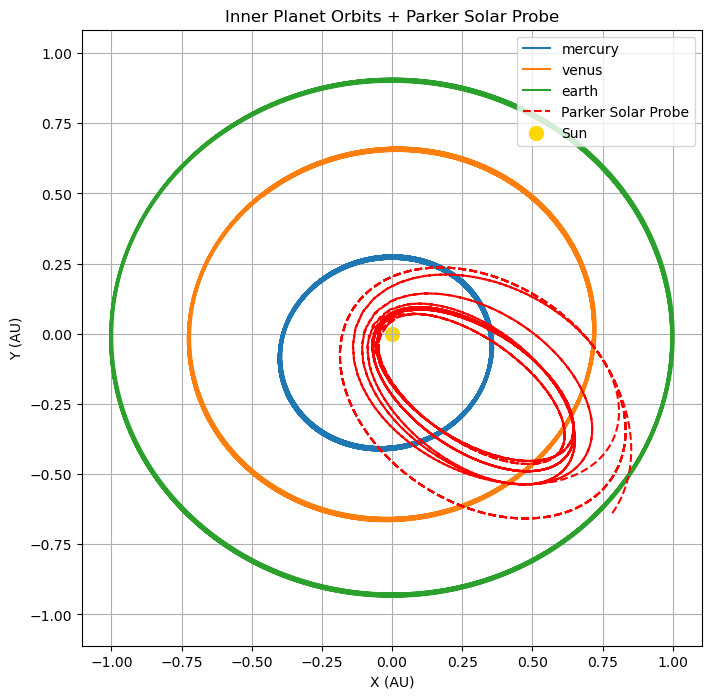

In [1]:

# Generate dates from 2018 to 2025 in 1-day increments
import spiceypy as spice
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import get_body_barycentric
from astropy.time import Time
import pandas as pd

# Load SPICE kernels (update paths accordingly)
spice.furnsh("./../spice/naif0012.tls")  # Leapseconds kernel
spice.furnsh("./../spice/spp_nom_20180812_20251001_v041_RO8.bsp")  # Parker Solar Probe trajectory

# Generate dates from 2018 to 2025 in 1-day increments
dates = pd.date_range(start="2018-08-15", end="2025-10-01", freq="D")
#d1 = pd.date_range(start="2018-08-15", end="2019-12-26", freq="D")
#d2 = pd.date_range(start="2019-12-28", end="2019-12-31", freq="D")
#dates = pd.concat([pd.Series(d1), pd.Series(d2)])
time = Time(dates)

# List of inner planets
planets = ['mercury', 'venus', 'earth']
planet_data = {}

# Create an empty DataFrame to store all data
data = pd.DataFrame()

for pp in planets:
    # Get planet positions relative to the Sun
    positions = get_body_barycentric(pp, time)
    
    # Convert to DataFrame
    df = pd.DataFrame({
        "date": dates,
        f"{pp}_x": positions.x.to_value("AU"),
        f"{pp}_y": positions.y.to_value("AU"),
        f"{pp}_z": positions.z.to_value("AU"),
    })
    
    # Merge planet data into the main DataFrame
    data = pd.merge(data, df, on="date", how="outer") if not data.empty else df

# Compute Parker Solar Probe positions using SPICE
psp_positions = []

for t in time:
    try:
        # Convert Astropy time to Ephemeris Time (ET) using the ISO format
        et = spice.str2et(t.iso)  # Convert time to Ephemeris Time
        state, _ = spice.spkpos("PARKER SOLAR PROBE", et, "ECLIPJ2000", "NONE", "SUN")
        psp_x = state[0] / 149597870.7  # Convert from km to AU
        psp_y = state[1] / 149597870.7
        psp_z = state[2] / 149597870.7

        # Append to list
        psp_positions.append([t.iso, psp_x, psp_y, psp_z])

    except spice.SpiceyError as e:  # Catching the SpiceyError exception correctly
        # Skip this iteration if data is missing and print a message
        print(f"Missing data for {t.iso}, skipping...")
        continue

# Convert Parker Solar Probe positions to DataFrame and merge with the main data
psp_df = pd.DataFrame(psp_positions, columns=["date", "psp_x", "psp_y", "psp_z"])

# Convert 'date' column in psp_df to datetime to match data['date']
psp_df["date"] = pd.to_datetime(psp_df["date"])

# Merge with the main data DataFrame
data = pd.merge(data, psp_df, on="date", how="outer")

# Save the DataFrame to a CSV file
data.to_csv("./data/planet_and_psp_positions.csv", index=False)

# Plot the data
plt.figure(figsize=(8, 8))

# Plot orbits of planets
for pp in planets:
    plt.plot(data[f"{pp}_x"], data[f"{pp}_y"], label=pp)

# Plot Parker Solar Probe's trajectory
plt.plot(data["psp_x"], data["psp_y"], color="red", linestyle="dashed", label="Parker Solar Probe")

# Plot Sun at the center
plt.scatter(0, 0, color='gold', marker='o', s=100, label="Sun")

# Formatting
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Inner Planet Orbits + Parker Solar Probe")
plt.legend()
plt.axis("equal")
plt.grid(True)

# Show plot
plt.show()

# Unload SPICE kernels when done
spice.kclear()


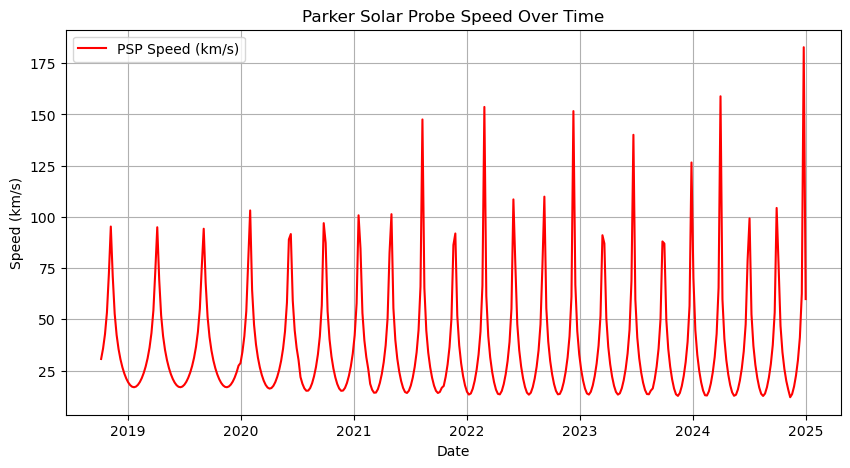

In [7]:
import spiceypy as spice
import numpy as np
import matplotlib.pyplot as plt

# Load SPICE kernels (update paths accordingly)
spice.furnsh("./../spice/naif0012.tls")  # Leapseconds kernel
spice.furnsh("./../spice/spp_nom_20180812_20251001_v041_RO8.bsp")  # PSP trajectory kernel

# Define time range (one year, daily intervals)
start_date = "2018-10-06"
end_date = "2024-12-31"
et_start = spice.str2et(start_date)
et_end = spice.str2et(end_date)
ets = np.linspace(et_start, et_end, 365)  # 365 time steps

# Get velocity vectors
velocities = []
dates = []

for et in ets:
    state, _ = spice.spkezr(targ="SPP", et=et, ref="ECLIPJ2000", abcorr="NONE", obs="SUN")  # PSP relative to Sun
    velocity = state[3:]  # Extract velocity components (vx, vy, vz)
    speed = np.linalg.norm(velocity)  # Compute speed magnitude in km/s
    velocities.append(speed)
    dates.append(spice.et2datetime(et))  # Convert ephemeris time to datetime

# Plot speed over time
plt.figure(figsize=(10, 5))
plt.plot(dates, velocities, label="PSP Speed (km/s)", color="red")
plt.xlabel("Date")
plt.ylabel("Speed (km/s)")
plt.title("Parker Solar Probe Speed Over Time")
plt.legend()
plt.grid()
plt.show()

# Unload kernels
spice.kclear()


In [9]:
df2 = pd.DataFrame({
    'Date': pd.to_datetime(dates),
    'Velocity': velocities
})

In [10]:
# Save the DataFrame to a CSV file
df2.to_csv("./data/psp_SPEED.csv", index=False)
